In [508]:
import cv2
import matplotlib.pyplot as plt

Original image provided:

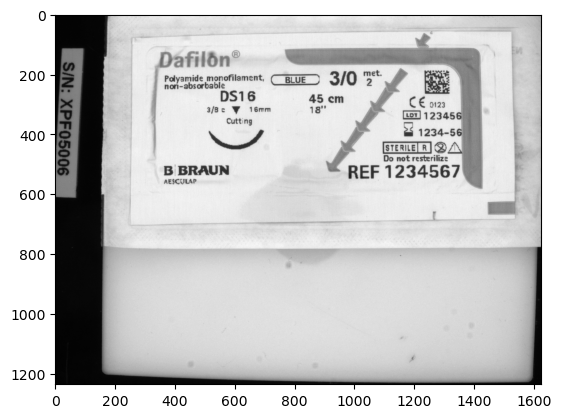

In [509]:
image = cv2.imread('original.bmp')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

Test image provided:

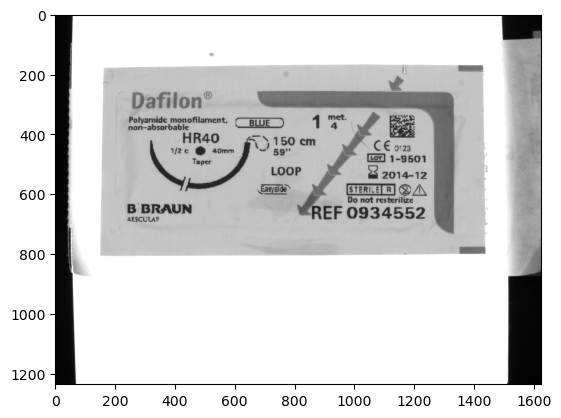

In [510]:
image_test = cv2.imread('perfecta-test.bmp')
image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
plt.imshow(image_test, cmap='gray')

We observe that the scale of the images is not the same and that both have background.

Our approach will be to reescale the test image to match the original one and then use hard coded pixel to cut out the numbers and detect them

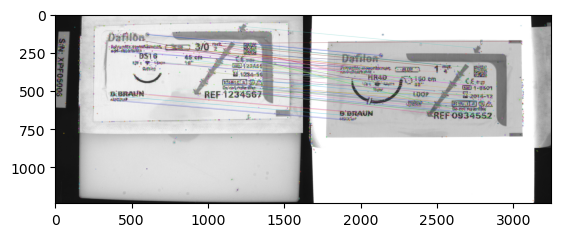

In [511]:
sift = cv2.SIFT_create()

#for feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

kp_or, des_or = sift.detectAndCompute(image,None)
kp_test, des_test = sift.detectAndCompute(image_test,None)

matches = bf.match(des_or,des_test)
matches = sorted(matches,key=lambda x:x.distance)

img = cv2.drawMatches(image,kp_or,image_test,kp_test,matches[300:360],image_test)
plt.imshow(img,cmap="gray")

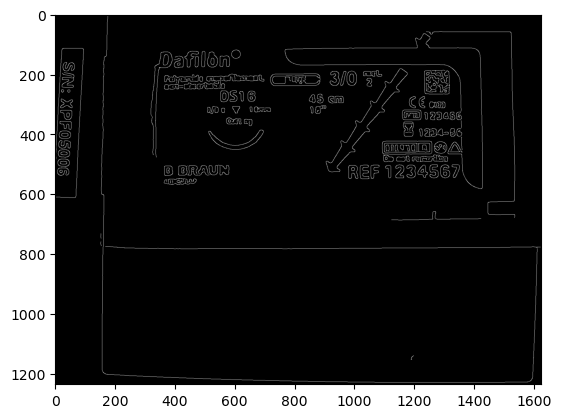

In [512]:
#Apply canny edge detector
edges = feature.canny(image, sigma=3)
plt.imshow(edges,cmap="gray") #we use default hysteresis thresholds

In [513]:
template = image[500:555,970:1090]

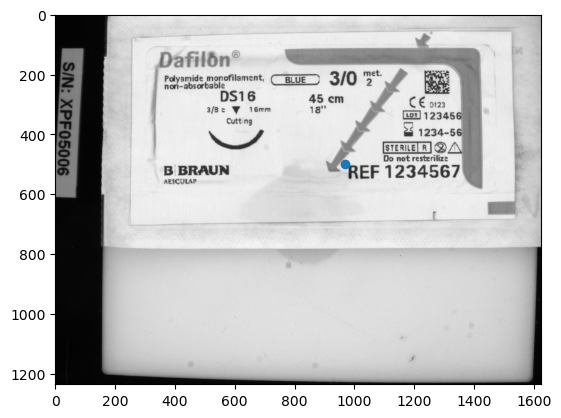

In [514]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

template = image[500:555,970:1090]

res = cv.matchTemplate(image,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8

res[np.where( res <= threshold)] = 0
res[np.where( res > threshold)] = 255

refs = (np.where(res == np.max(res)))
ref_point = [refs[0][0],refs[1][0]]

plt.imshow(image,cmap="gray")
plt.scatter(ref_point[1],ref_point[0])
plt.show()

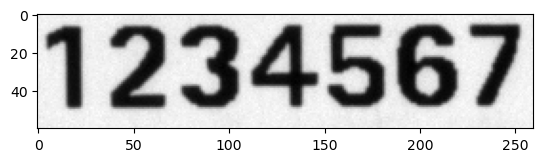

In [515]:
numbers = image[ref_point[0]:ref_point[0]+60, ref_point[1]+130:ref_point[1]+390]
plt.imshow(numbers,cmap="gray")

Once we have the numbers we can proceed to detect which ones are what

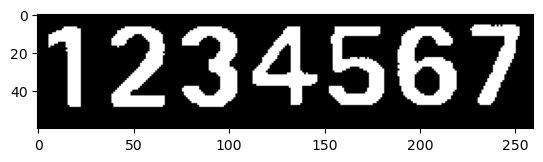

In [516]:
#Apply binary threshold
#first of all threshold the image to convert it to binary
(thresh, numbers) = cv2.threshold(numbers, 120, 255, cv2.THRESH_BINARY)

#invert image
numbers = (numbers*-1)+255
plt.imshow(numbers,cmap="gray")

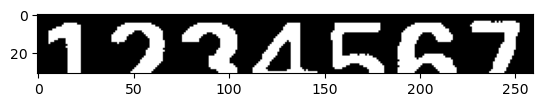

In [517]:

plt.imshow(numbers[2:33,:],cmap="gray")

In [518]:
def crop_to_edges(image):
    #along y axis
    fin_image = image
    squished_image = np.sum(image,axis=1)
    start_idx = None
    for i, val in enumerate(squished_image):
        if val > 0:
            if(start_idx == None): #look for first not 0 pixel
                start_idx = i#set start index
        
        elif(start_idx != None): #if found 0 pixel and start_idx set
            fin_image = image[start_idx:i,:] #crop image
            break
    
        if(i+1 == len(squished_image) and start_idx != None): #if finished iterating and start_idx set
            fin_image = image[start_idx:i,:] #crop image
            break

    #along x axis
    squished_image = np.sum(image,axis=0)
    start_idx = None
    for i, val in enumerate(squished_image):
        if val > 0:#look for first not 0 pixel
            if(start_idx == None):
                start_idx = i#set start index

        elif(start_idx != None):#if found 0 pixel and start_idx set
            return fin_image[:,start_idx:i] #crop image and end           
        
        if(i+1 == len(squished_image) and start_idx != None): #if finished iterating and start_idx set
            return fin_image[:,start_idx:i] #crop image
        
        if(i+1 == len(squished_image) and start_idx == None):
            print(i)
            return fin_image
        
    

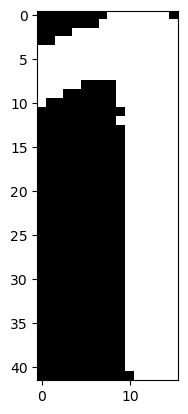

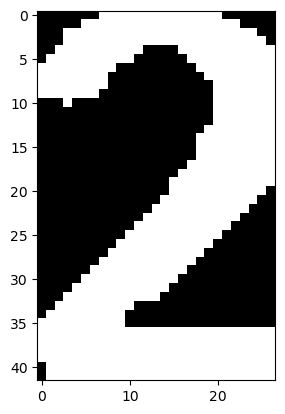

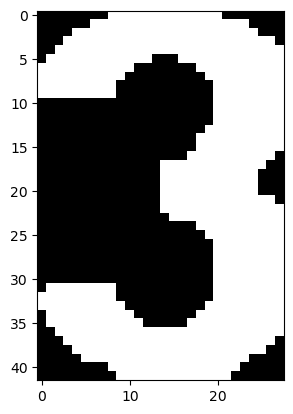

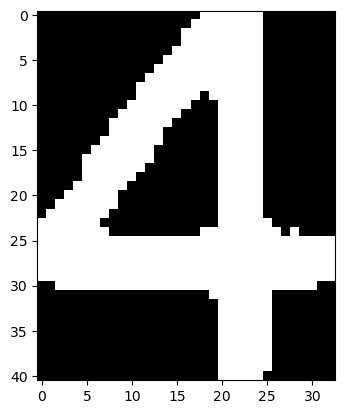

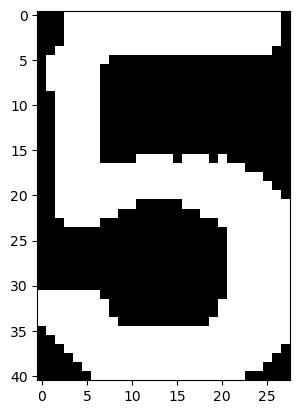

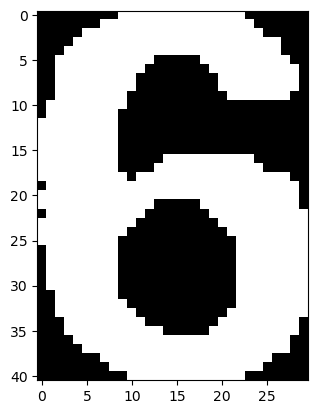

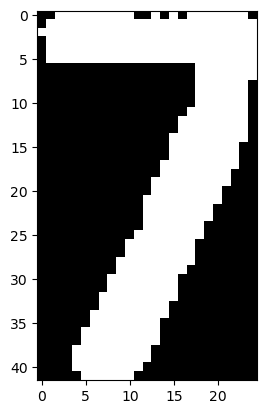

In [519]:
#Now we'll do a column-wise scan to check where numbers start and end so we can get them cut().
squished_image = np.sum(numbers,axis=0)

#we'll store here the cropped number images
digits = []
cnt = 0
start_idx = None
for i, val in enumerate(squished_image):
    if val > 0:
        if(start_idx == None):
            start_idx = i
    
    elif(start_idx != None):
        digits.append(numbers[:,start_idx:i])
        start_idx = None

fin_digits = []
for digit in digits:
    fin_digits.append(crop_to_edges(digit))

for digit in fin_digits:
    plt.imshow(digit,cmap="gray")
    plt.show()

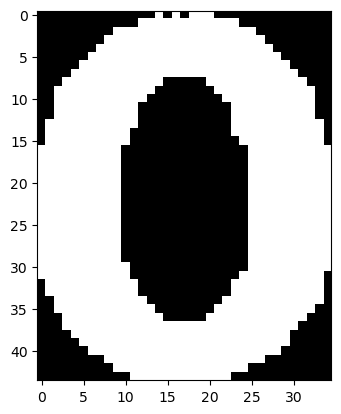

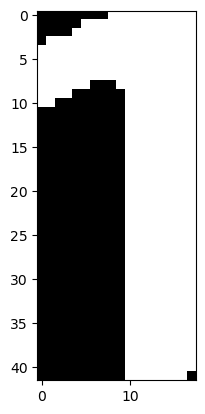

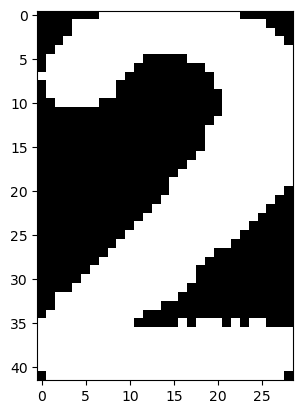

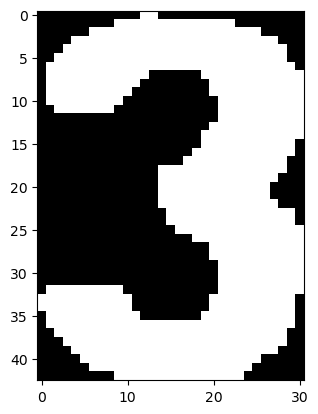

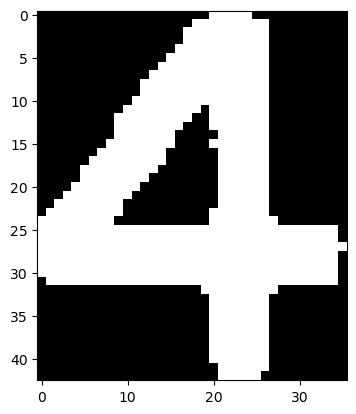

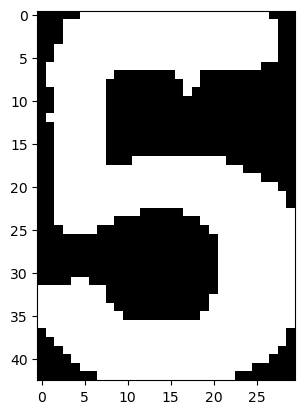

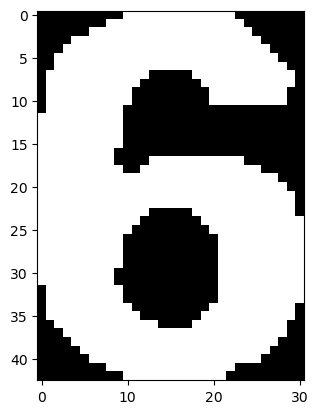

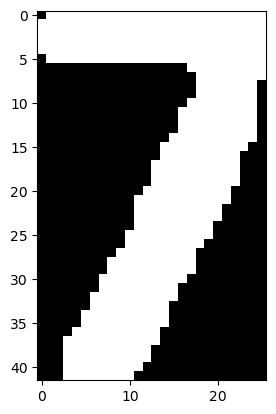

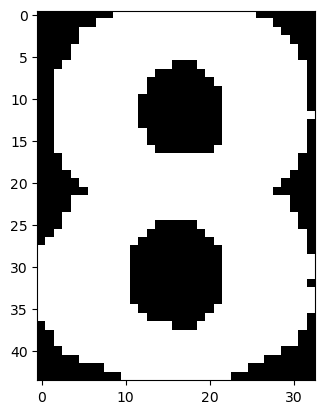

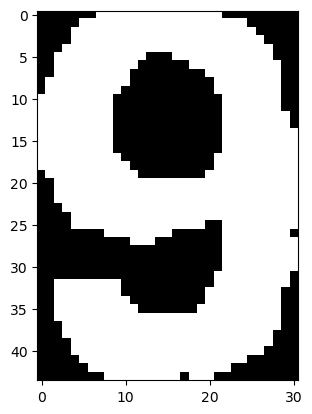

In [520]:
#load template images
templates = []
for i in range(10):
    #load template images
    templ = cv2.imread(f'NUMBERS/{i}.bmp')
    templ = cv2.cvtColor(templ, cv2.COLOR_BGR2GRAY)
    
    #apply same threshold
    (thresh, templ) = cv2.threshold(templ, 120, 255, cv2.THRESH_BINARY)
    templ = (templ*-1)+255 #invert image
    templ = crop_to_edges(templ) #crop image
    templates.append(templ)
    plt.imshow(templ,cmap="gray")
    plt.show()

In [521]:
templates

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0, 255,   0, 255,   0, 255, 255, 255,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255,
         255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         255, 255,   0,   0,   0,   0,  

In [522]:
def eval_digits(digit,templates):
    eval_digit = np.zeros(len(templates))  #we will store match value for each template for the provided digit
    for t , template in enumerate(templates): #iterate through all templates
        d_h , d_w = digit.shape
        dig_cpy = digit.copy()
        t_h , t_w = template.shape
        tem_cpy = template.copy()
        w_diff = abs(d_w-t_w)
        h_diff = abs(d_h-t_h)

        if(w_diff != 0): #if width between images doesn't match
            if d_w > t_w: #if digit is wider than template
                if w_diff % 2 == 0: #if we can split difference equally on either side
                    tem_cpy = cv2.copyMakeBorder(tem_cpy, top=0, bottom=0, left = int(w_diff/2), right= int(w_diff/2), value=0, borderType=cv2.BORDER_CONSTANT)
                else: # if indivisible equally put half and hald but left border has one extra
                    tem_cpy = cv2.copyMakeBorder(tem_cpy, top=0, bottom=0, left = int(w_diff/2)+1, right = int(w_diff/2), value=0, borderType=cv2.BORDER_CONSTANT)
            else: # t_w > d_w
                if w_diff % 2 == 0: #if we can split difference equally on either side
                    dig_cpy = cv2.copyMakeBorder(dig_cpy, top=0, bottom=0, left = int(w_diff/2), right = int(w_diff/2), value=0, borderType=cv2.BORDER_CONSTANT)
                else: # if indivisible equally put half and hald but left border has one extra
                    dig_cpy = cv2.copyMakeBorder(dig_cpy, top=0, bottom=0, left = int(w_diff/2)+1, right = int(w_diff/2), value=0, borderType=cv2.BORDER_CONSTANT)
        
        if(h_diff != 0): #if width between images doesn't match
            if d_h > t_h: #if digit is wider than template
                if h_diff % 2 == 0: #if we can split difference equally on either side
                    tem_cpy = cv2.copyMakeBorder(tem_cpy, left=0, right=0, top = int(h_diff/2), bottom = int(h_diff/2), value=0, borderType=cv2.BORDER_CONSTANT)
                else: # if indivisible equally put half and hald but left border has one extra
                    tem_cpy = cv2.copyMakeBorder(tem_cpy,left=0,right=0,top = int(h_diff/2)+1, bottom = int(h_diff/2), value=0, borderType=cv2.BORDER_CONSTANT)
            else: # t_h > d_h
                if h_diff % 2 == 0: #if we can split difference equally on either side
                    dig_cpy = cv2.copyMakeBorder(dig_cpy, left=0, right=0, top = int(h_diff/2), bottom = int(h_diff/2), value=0, borderType=cv2.BORDER_CONSTANT)
                else: # if indivisible equally put half and hald but left border has one extra
                    dig_cpy = cv2.copyMakeBorder(dig_cpy, left=0, right=0, top = int(h_diff/2)+1, bottom = int(h_diff/2), value=0, borderType=cv2.BORDER_CONSTANT)

        eval_digit[t]  = np.mean(dig_cpy == tem_cpy) #mean of how many match for that template

    match = np.where(eval_digit == np.max(eval_digit))[0][0] #number with bigger match
    return eval_digit, templates[match], match 


Digit: 


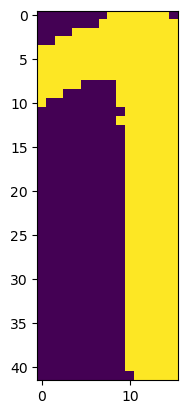

Template max: 
NUMBER DETECTED:  1


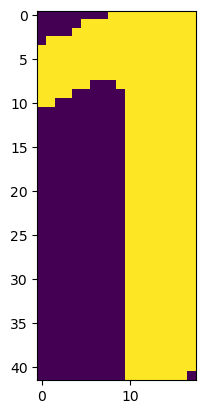


Digit: 


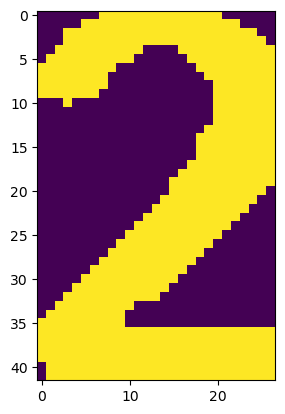

Template max: 
NUMBER DETECTED:  2


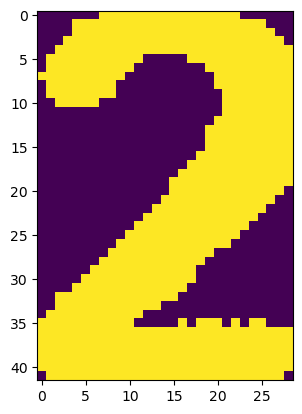


Digit: 


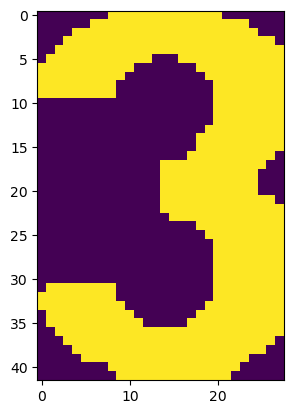

Template max: 
NUMBER DETECTED:  3


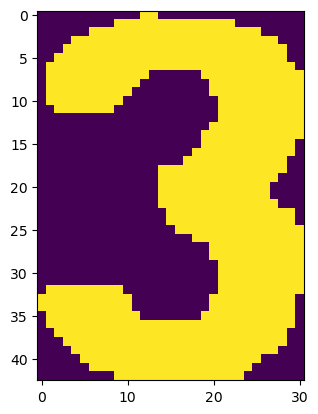


Digit: 


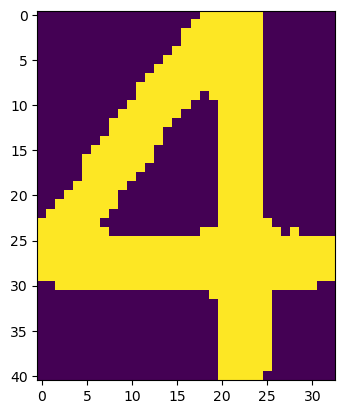

Template max: 
NUMBER DETECTED:  4


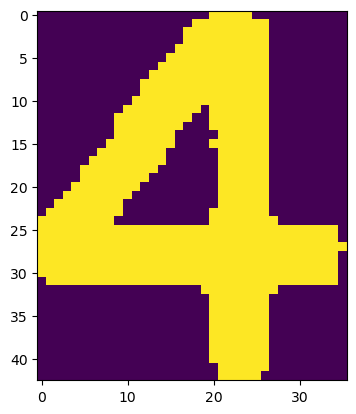


Digit: 


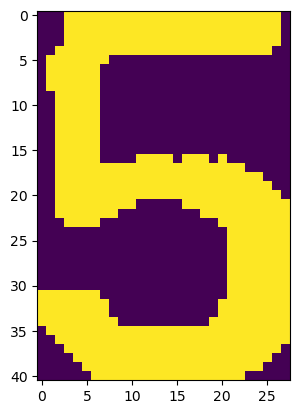

Template max: 
NUMBER DETECTED:  5


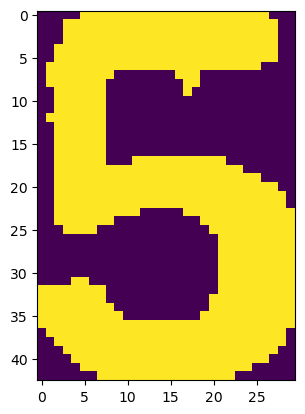


Digit: 


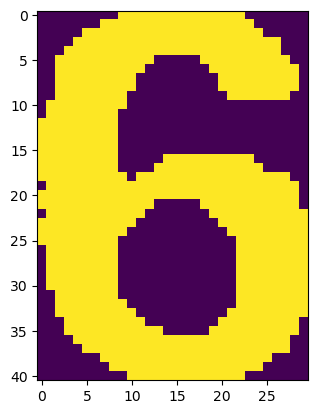

Template max: 
NUMBER DETECTED:  6


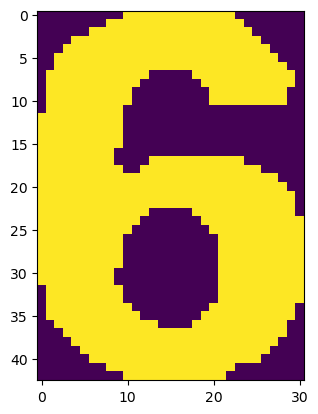


Digit: 


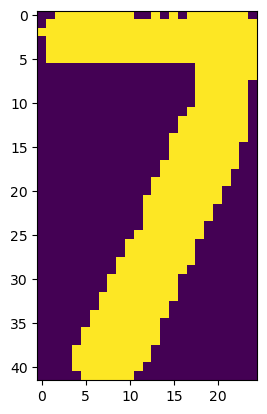

Template max: 
NUMBER DETECTED:  7


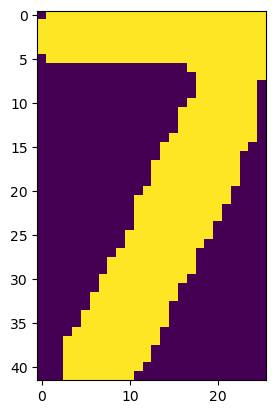

In [523]:
for digit in fin_digits:
    print("Digit: ")
    plt.imshow(digit)
    plt.show()
    print("Template max: ")
    eval_digit, template_match, match = eval_digits(digit,templates)
    print("NUMBER DETECTED: ",match)
    plt.imshow(template_match)
    plt.show()
    print("")

Now on test image:

In [526]:
template =np.array([[234, 237, 232, 235, 234, 236, 240, 234, 234, 236, 231, 235, 235,
        236, 235, 233, 231, 234, 232, 235, 233, 236, 231, 236, 232, 234,
        236, 233, 228, 239, 227, 237, 234, 235, 236, 233, 233, 232, 236,
        240, 236, 234, 235, 244, 240, 239, 241, 237, 238, 237, 239, 233,
        235, 238, 234, 229, 236, 232, 228, 236, 229, 232, 234, 236, 230,
        228, 229, 235, 232, 235, 234, 234, 236, 235, 235, 231, 243, 230,
        236, 236, 234, 241, 235, 237, 232, 234, 232, 230, 239, 232, 234,
        228, 228, 236, 231, 230, 234, 232, 239, 230, 238, 233, 229, 237,
        236, 229, 234, 235, 234, 237, 231, 236, 235, 234, 232, 229, 233,
        237, 238, 239],
       [237, 234, 236, 237, 233, 232, 234, 238, 241, 234, 231, 238, 229,
        238, 226, 227, 234, 235, 236, 231, 232, 233, 230, 231, 231, 237,
        234, 231, 227, 228, 230, 231, 233, 237, 236, 233, 231, 232, 233,
        237, 234, 239, 238, 236, 233, 233, 235, 238, 232, 237, 234, 239,
        233, 233, 230, 238, 233, 233, 230, 231, 233, 232, 233, 233, 231,
        237, 232, 233, 230, 236, 231, 233, 235, 228, 223, 225, 235, 232,
        234, 235, 238, 234, 240, 238, 239, 235, 230, 237, 234, 230, 233,
        228, 230, 233, 230, 230, 234, 236, 232, 228, 230, 230, 233, 232,
        232, 231, 230, 233, 234, 229, 235, 233, 234, 231, 235, 232, 232,
        233, 236, 239],
       [229, 231, 232, 233, 233, 233, 237, 238, 233, 235, 231, 230, 238,
        227, 235, 228, 231, 232, 230, 228, 225, 228, 233, 232, 232, 231,
        228, 232, 228, 233, 231, 227, 237, 235, 235, 234, 235, 232, 234,
        234, 233, 237, 230, 240, 236, 233, 232, 240, 232, 236, 232, 229,
        232, 233, 229, 228, 229, 232, 234, 233, 229, 232, 225, 232, 231,
        234, 228, 228, 230, 229, 234, 230, 233, 236, 229, 225, 231, 233,
        232, 232, 235, 232, 236, 237, 234, 231, 231, 234, 229, 230, 227,
        228, 229, 229, 230, 232, 227, 226, 229, 229, 225, 228, 225, 233,
        230, 228, 227, 234, 227, 236, 227, 235, 232, 228, 227, 230, 232,
        237, 233, 233],
       [238, 240, 236, 236, 239, 236, 228, 234, 233, 228, 236, 230, 233,
        228, 225, 226, 227, 228, 226, 228, 229, 228, 228, 227, 223, 229,
        233, 228, 228, 234, 228, 229, 229, 229, 233, 233, 233, 228, 235,
        231, 234, 235, 238, 237, 234, 231, 235, 232, 235, 227, 229, 229,
        226, 228, 232, 228, 226, 224, 225, 224, 227, 223, 225, 226, 225,
        226, 221, 225, 229, 219, 221, 227, 224, 225, 224, 228, 230, 230,
        231, 230, 233, 235, 239, 238, 230, 228, 226, 222, 222, 226, 225,
        225, 219, 223, 225, 220, 223, 227, 226, 221, 222, 219, 223, 222,
        222, 220, 223, 223, 220, 227, 229, 228, 225, 230, 230, 239, 227,
        231, 240, 239],
       [240, 231, 237, 232, 237, 229, 236, 231, 233, 228, 231, 226, 224,
        219, 221, 219, 217, 219, 216, 219, 217, 216, 219, 219, 217, 219,
        218, 216, 218, 216, 217, 220, 223, 229, 227, 232, 228, 228, 234,
        236, 235, 230, 235, 234, 234, 232, 235, 238, 235, 230, 221, 215,
        214, 215, 213, 212, 211, 215, 214, 210, 214, 211, 208, 209, 206,
        211, 211, 211, 201, 206, 204, 207, 211, 209, 208, 210, 212, 222,
        228, 232, 229, 232, 232, 231, 233, 217, 215, 203, 207, 198, 198,
        198, 197, 197, 195, 199, 195, 193, 198, 195, 196, 190, 189, 193,
        194, 200, 199, 200, 201, 210, 209, 204, 207, 221, 233, 231, 231,
        236, 229, 237],
       [237, 236, 237, 235, 236, 228, 233, 233, 231, 231, 220, 204, 191,
        183, 179, 176, 172, 169, 167, 173, 168, 166, 164, 170, 161, 166,
        159, 164, 166, 163, 166, 180, 194, 212, 222, 219, 226, 226, 230,
        231, 234, 234, 238, 230, 230, 237, 232, 231, 225, 207, 177, 168,
        161, 162, 158, 154, 161, 153, 157, 150, 154, 154, 148, 149, 148,
        146, 149, 149, 152, 148, 146, 144, 143, 150, 147, 152, 156, 179,
        214, 230, 230, 234, 230, 229, 217, 185, 155, 145, 143, 138, 134,
        136, 129, 129, 128, 131, 128, 126, 130, 132, 128, 125, 125, 128,
        129, 128, 128, 132, 134, 145, 146, 138, 149, 190, 225, 229, 230,
        233, 235, 234],
       [238, 236, 233, 235, 233, 233, 234, 234, 231, 223, 203, 149, 122,
        113, 105, 108, 106, 104, 103, 105, 101, 101, 101,  96,  99,  95,
         93,  94,  97,  96, 101, 108, 137, 170, 186, 191, 190, 204, 224,
        227, 226, 232, 232, 237, 230, 236, 234, 229, 229, 182, 123, 103,
        100,  97,  91,  93,  94,  90,  96,  89,  88,  91,  87,  91,  87,
         92,  91,  87,  86,  88,  86,  88,  87,  86,  87,  91,  98, 124,
        183, 226, 227, 232, 225, 231, 196, 146,  98,  90,  85,  82,  80,
         75,  77,  77,  77,  80,  82,  80,  79,  81,  81,  80,  77,  79,
         80,  80,  83,  81,  79,  88,  91,  90, 104, 157, 216, 225, 230,
        231, 232, 232],
       [238, 235, 231, 238, 237, 237, 229, 229, 233, 224, 186, 118,  86,
         80,  80,  78,  72,  72,  70,  73,  71,  72,  74,  70,  74,  74,
         72,  74,  73,  73,  76,  78,  85, 109, 122, 120, 130, 157, 200,
        218, 223, 232, 228, 229, 227, 234, 231, 224, 218, 172, 111,  84,
         76,  75,  72,  69,  70,  70,  71,  70,  71,  73,  70,  72,  75,
         74,  71,  70,  70,  71,  70,  70,  72,  75,  74,  78,  78, 108,
        179, 220, 224, 229, 227, 223, 197, 135,  84,  74,  70,  70,  68,
         68,  68,  67,  67,  69,  71,  69,  70,  72,  72,  70,  69,  68,
         71,  70,  69,  74,  73,  75,  76,  79,  94, 150, 205, 223, 227,
        229, 234, 232],
       [232, 237, 233, 233, 235, 232, 233, 231, 230, 223, 180, 115,  80,
         75,  67,  67,  66,  67,  69,  68,  67,  68,  66,  67,  66,  70,
         71,  70,  72,  68,  68,  69,  67,  72,  77,  79,  84, 105, 150,
        195, 219, 227, 232, 235, 229, 234, 229, 226, 217, 171, 103,  78,
         71,  73,  66,  66,  68,  65,  69,  67,  66,  68,  69,  70,  67,
         69,  71,  67,  70,  70,  67,  70,  68,  72,  71,  73,  80, 108,
        175, 222, 225, 230, 226, 224, 195, 133,  83,  73,  69,  65,  67,
         67,  65,  60,  65,  67,  65,  68,  69,  70,  67,  66,  68,  66,
         70,  70,  69,  70,  69,  70,  73,  77,  90, 146, 210, 221, 225,
        232, 229, 233],
       [237, 233, 233, 238, 236, 231, 233, 229, 226, 220, 184, 113,  74,
         69,  70,  66,  65,  63,  64,  65,  66,  67,  66,  65,  68,  67,
         67,  66,  68,  68,  69,  67,  63,  68,  70,  69,  75,  82, 108,
        167, 217, 222, 227, 229, 233, 233, 234, 229, 220, 173, 104,  73,
         69,  68,  66,  66,  66,  64,  68,  65,  68,  68,  67,  69,  67,
         67,  68,  68,  71,  69,  72,  69,  72,  69,  70,  72,  79, 113,
        183, 222, 231, 225, 225, 220, 199, 135,  78,  73,  65,  62,  62,
         65,  61,  64,  67,  66,  70,  65,  69,  67,  67,  71,  70,  69,
         70,  71,  69,  71,  73,  76,  76,  74,  92, 155, 205, 222, 230,
        228, 232, 235],
       [230, 231, 231, 237, 233, 231, 231, 230, 226, 225, 181, 113,  75,
         67,  67,  65,  64,  62,  62,  63,  68,  70,  72,  72,  72,  72,
         71,  75,  76,  75,  70,  69,  63,  66,  63,  68,  67,  71,  87,
        147, 201, 224, 224, 229, 235, 232, 232, 228, 217, 174, 101,  73,
         67,  64,  61,  62,  68,  68,  71,  71,  74,  76,  81,  77,  78,
         78,  74,  80,  81,  78,  80,  80,  80,  79,  87,  84, 101, 133,
        198, 220, 231, 226, 223, 229, 203, 139,  81,  68,  67,  63,  65,
         65,  63,  62,  69,  72,  82,  82,  85,  80,  87,  88,  86,  88,
         87,  91,  92,  91,  94,  93,  96,  97, 124, 173, 222, 225, 230,
        231, 237, 232],
       [228, 234, 228, 233, 235, 236, 233, 228, 229, 222, 187, 112,  77,
         71,  64,  63,  64,  62,  64,  69,  76,  96, 107, 109, 110, 112,
        111, 111, 114, 106,  94,  76,  68,  63,  64,  64,  66,  67,  77,
        118, 172, 213, 222, 228, 228, 233, 230, 227, 216, 177, 106,  72,
         69,  64,  61,  61,  64,  75,  97, 119, 120, 123, 128, 125, 127,
        126, 126, 128, 125, 131, 133, 131, 133, 136, 139, 144, 160, 177,
        212, 226, 224, 227, 229, 224, 208, 137,  83,  70,  68,  62,  60,
         63,  66,  64,  76, 111, 134, 140, 142, 139, 143, 143, 144, 151,
        146, 149, 157, 155, 154, 157, 158, 164, 182, 209, 229, 233, 232,
        229, 235, 234],
       [227, 239, 230, 232, 231, 228, 230, 231, 223, 224, 182, 118,  75,
         68,  66,  65,  62,  66,  64,  66,  99, 147, 171, 177, 178, 182,
        180, 179, 177, 169, 151,  98,  70,  65,  65,  62,  63,  69,  69,
         83, 125, 190, 223, 225, 228, 234, 229, 223, 221, 173, 106,  69,
         65,  66,  63,  66,  66,  94, 149, 178, 184, 188, 188, 190, 190,
        187, 194, 200, 188, 195, 198, 194, 201, 200, 200, 200, 209, 220,
        226, 228, 233, 232, 227, 227, 204, 138,  79,  70,  63,  61,  62,
         62,  61,  67,  93, 148, 187, 197, 204, 201, 208, 207, 204, 205,
        205, 208, 215, 207, 210, 209, 212, 212, 222, 232, 228, 227, 231,
        231, 235, 240],
       [231, 226, 230, 235, 231, 231, 229, 232, 227, 222, 185, 117,  77,
         68,  62,  64,  64,  62,  66,  74, 114, 178, 208, 212, 216, 213,
        220, 220, 212, 212, 176, 118,  75,  63,  62,  64,  64,  64,  65,
         75, 108, 173, 223, 226, 224, 233, 231, 223, 219, 178, 104,  69,
         70,  62,  62,  64,  71, 105, 167, 208, 208, 216, 215, 220, 213,
        216, 222, 227, 220, 222, 226, 222, 221, 217, 224, 223, 226, 225,
        228, 235, 233, 232, 226, 225, 206, 134,  81,  68,  66,  62,  61,
         62,  66,  68,  97, 166, 207, 220, 221, 219, 224, 221, 224, 224,
        223, 221, 228, 225, 225, 228, 226, 223, 224, 233, 228, 233, 231,
        230, 234, 239],
       [234, 231, 236, 236, 236, 231, 232, 231, 220, 220, 186, 116,  76,
         65,  64,  64,  61,  62,  64,  75, 121, 180, 214, 213, 223, 225,
        225, 228, 220, 217, 189, 121,  75,  67,  66,  64,  63,  66,  66,
         71, 107, 176, 221, 225, 231, 231, 236, 224, 215, 177, 105,  71,
         68,  65,  65,  65,  74, 108, 178, 213, 218, 223, 217, 221, 225,
        227, 224, 225, 224, 228, 223, 224, 223, 228, 226, 224, 228, 232,
        232, 231, 235, 229, 231, 227, 204, 137,  77,  67,  64,  64,  59,
         64,  64,  66, 102, 169, 211, 218, 228, 219, 227, 223, 229, 223,
        230, 231, 231, 222, 227, 232, 222, 229, 227, 232, 234, 235, 231,
        234, 236, 237],
       [234, 235, 232, 238, 230, 237, 230, 234, 232, 219, 185, 111,  71,
         66,  64,  63,  61,  62,  66,  77, 121, 186, 220, 225, 228, 227,
        229, 223, 225, 213, 194, 128,  78,  68,  61,  60,  64,  66,  66,
         73, 107, 180, 216, 228, 226, 229, 229, 228, 217, 172, 104,  71,
         64,  65,  65,  64,  72, 109, 184, 217, 223, 222, 229, 225, 227,
        224, 227, 229, 226, 229, 232, 232, 231, 228, 227, 227, 234, 229,
        234, 232, 230, 226, 224, 221, 205, 135,  81,  69,  66,  66,  64,
         63,  66,  68, 106, 174, 214, 223, 226, 230, 225, 228, 228, 232,
        230, 229, 231, 229, 228, 228, 236, 233, 230, 233, 233, 232, 235,
        231, 232, 234],
       [234, 229, 234, 234, 234, 226, 229, 228, 232, 221, 186, 117,  73,
         66,  61,  63,  61,  64,  69,  76, 127, 195, 219, 220, 227, 222,
        220, 226, 225, 216, 201, 134,  78,  65,  64,  62,  62,  65,  66,
         72, 114, 186, 217, 226, 227, 230, 230, 229, 216, 175, 101,  73,
         67,  65,  65,  66,  74, 113, 185, 213, 225, 224, 227, 222, 230,
        231, 228, 227, 224, 227, 227, 234, 232, 230, 227, 224, 236, 236,
        238, 235, 232, 232, 232, 226, 205, 136,  82,  66,  64,  62,  62,
         65,  64,  68, 104, 177, 219, 222, 223, 225, 225, 230, 226, 226,
        234, 234, 232, 228, 233, 230, 233, 234, 233, 233, 235, 232, 232,
        232, 238, 236],
       [228, 232, 231, 237, 226, 232, 232, 235, 235, 223, 188, 116,  74,
         64,  65,  62,  60,  62,  65,  74, 125, 194, 220, 228, 229, 225,
        230, 229, 226, 221, 199, 133,  78,  66,  64,  63,  62,  65,  63,
         74, 113, 184, 220, 226, 228, 233, 227, 229, 224, 172, 105,  73,
         66,  64,  65,  62,  72, 119, 187, 213, 224, 224, 230, 223, 225,
        232, 227, 228, 232, 234, 230, 233, 226, 231, 231, 236, 232, 232,
        236, 236, 229, 231, 232, 230, 205, 139,  78,  67,  64,  62,  61,
         61,  66,  67, 103, 175, 215, 227, 229, 226, 228, 226, 230, 225,
        225, 235, 229, 230, 231, 230, 232, 230, 231, 231, 231, 235, 236,
        237, 234, 231],
       [242, 229, 232, 230, 232, 234, 239, 237, 224, 223, 187, 117,  77,
         67,  61,  61,  63,  65,  65,  78, 130, 192, 221, 226, 227, 225,
        227, 229, 223, 217, 202, 135,  81,  67,  65,  60,  62,  64,  66,
         74, 114, 186, 223, 220, 227, 227, 227, 230, 219, 174, 109,  71,
         66,  62,  65,  65,  74, 116, 189, 216, 225, 230, 229, 224, 227,
        228, 225, 231, 226, 230, 233, 229, 229, 226, 232, 230, 227, 234,
        223, 234, 229, 231, 228, 223, 207, 143,  87,  66,  63,  61,  61,
         61,  62,  69, 104, 178, 215, 220, 223, 227, 230, 223, 230, 229,
        233, 231, 228, 226, 233, 233, 232, 233, 233, 235, 227, 233, 237,
        234, 236, 235],
       [235, 225, 241, 237, 236, 233, 236, 230, 225, 223, 188, 120,  77,
         69,  62,  63,  61,  64,  64,  79, 129, 195, 218, 225, 227, 229,
        224, 230, 224, 223, 197, 132,  79,  69,  65,  62,  64,  64,  66,
         73, 109, 177, 217, 226, 224, 228, 227, 224, 217, 177, 110,  70,
         68,  60,  63,  62,  70, 119, 189, 218, 219, 225, 222, 224, 224,
        222, 234, 229, 227, 225, 226, 229, 232, 230, 233, 234, 231, 235,
        235, 232, 227, 231, 229, 225, 209, 149,  87,  69,  65,  60,  61,
         61,  63,  66, 101, 177, 217, 222, 223, 223, 229, 225, 225, 225,
        230, 230, 229, 227, 230, 228, 230, 227, 234, 235, 237, 234, 231,
        239, 237, 235],
       [232, 227, 234, 234, 233, 232, 232, 233, 225, 221, 189, 119,  74,
         65,  63,  62,  63,  63,  64,  76, 124, 193, 216, 224, 228, 227,
        223, 232, 225, 215, 193, 131,  78,  65,  63,  59,  62,  64,  66,
         75, 116, 186, 217, 220, 230, 225, 225, 228, 216, 178, 105,  70,
         66,  63,  62,  65,  70, 115, 184, 212, 225, 229, 231, 232, 223,
        228, 229, 225, 225, 224, 229, 230, 231, 228, 229, 229, 226, 231,
        230, 233, 230, 233, 226, 226, 209, 144,  85,  67,  63,  60,  61,
         63,  63,  65, 102, 171, 218, 221, 226, 230, 225, 224, 228, 226,
        226, 233, 225, 223, 226, 225, 226, 228, 225, 230, 235, 233, 240,
        232, 238, 240],
       [229, 225, 234, 231, 232, 229, 236, 230, 229, 221, 186, 115,  74,
         67,  63,  61,  60,  63,  64,  74, 126, 190, 222, 224, 223, 227,
        225, 227, 217, 213, 180, 124,  77,  66,  63,  61,  64,  63,  69,
         83, 133, 197, 216, 229, 226, 227, 233, 226, 216, 179, 105,  73,
         65,  64,  62,  64,  71, 117, 187, 213, 218, 221, 221, 224, 218,
        220, 223, 228, 222, 224, 225, 224, 227, 223, 221, 230, 233, 228,
        227, 230, 230, 231, 232, 227, 210, 140,  82,  68,  68,  63,  61,
         61,  61,  66, 101, 171, 206, 218, 215, 221, 225, 224, 224, 223,
        232, 226, 228, 219, 229, 236, 225, 226, 228, 239, 233, 233, 231,
        234, 234, 235],
       [233, 234, 228, 234, 235, 232, 228, 233, 227, 220, 187, 121,  75,
         64,  63,  60,  62,  63,  63,  75, 122, 187, 211, 222, 218, 224,
        220, 224, 211, 188, 142,  98,  70,  63,  63,  64,  66,  71,  76,
        108, 163, 204, 223, 232, 228, 226, 226, 227, 218, 175, 107,  72,
         63,  65,  65,  63,  71, 112, 176, 212, 212, 218, 216, 219, 217,
        221, 216, 215, 218, 211, 217, 218, 218, 220, 217, 224, 225, 226,
        230, 230, 230, 220, 234, 221, 207, 140,  79,  66,  62,  62,  60,
         60,  63,  63,  95, 158, 199, 210, 207, 212, 210, 215, 211, 213,
        213, 216, 221, 214, 221, 221, 223, 227, 227, 229, 233, 238, 233,
        235, 239, 236],
       [226, 230, 235, 231, 235, 228, 229, 235, 223, 218, 190, 123,  75,
         65,  63,  59,  57,  59,  62,  68, 107, 164, 184, 188, 188, 191,
        196, 195, 177, 130,  92,  74,  63,  61,  64,  64,  67,  76, 105,
        155, 198, 221, 224, 234, 231, 231, 232, 220, 218, 180, 111,  72,
         66,  60,  63,  62,  70,  94, 147, 178, 178, 174, 180, 177, 179,
        184, 180, 180, 179, 177, 175, 178, 185, 181, 173, 187, 189, 198,
        211, 226, 233, 226, 226, 228, 209, 150,  88,  66,  66,  61,  59,
         61,  60,  63,  79, 120, 149, 153, 157, 157, 159, 162, 158, 159,
        163, 161, 165, 162, 172, 175, 179, 194, 222, 229, 224, 232, 232,
        233, 235, 235],
       [225, 230, 232, 234, 233, 231, 234, 237, 221, 220, 185, 118,  73,
         64,  62,  60,  58,  56,  59,  63,  82, 109, 122, 126, 128, 127,
        128, 126, 114,  90,  71,  66,  61,  59,  65,  70,  76, 107, 157,
        197, 216, 223, 233, 226, 232, 224, 234, 224, 222, 184, 114,  72,
         65,  62,  60,  61,  65,  70,  98, 114, 110, 108, 108, 109, 110,
        111, 110, 108, 109, 108, 107, 109, 110, 107, 107, 111, 120, 144,
        182, 219, 228, 224, 228, 222, 210, 156,  90,  66,  63,  60,  60,
         59,  58,  59,  65,  76,  83,  88,  91,  95,  95,  96,  94,  92,
         94,  98,  96,  99, 104, 102, 112, 144, 197, 220, 226, 226, 233,
        237, 240, 239],
       [220, 224, 226, 227, 228, 225, 229, 232, 223, 223, 189, 117,  72,
         66,  61,  57,  58,  58,  56,  62,  64,  69,  74,  75,  75,  77,
         78,  76,  77,  70,  65,  63,  61,  63,  67,  77, 103, 152, 192,
        215, 217, 227, 229, 233, 232, 233, 229, 228, 218, 185, 115,  71,
         64,  64,  61,  60,  63,  63,  71,  77,  75,  73,  74,  74,  75,
         74,  75,  71,  74,  74,  72,  72,  75,  77,  77,  78,  84, 106,
        164, 213, 228, 225, 228, 221, 211, 157,  89,  66,  60,  59,  59,
         59,  58,  56,  62,  62,  67,  68,  70,  71,  71,  72,  71,  73,
         73,  71,  75,  73,  72,  76,  84, 119, 189, 221, 229, 229, 238,
        239, 235, 235],
       [215, 213, 224, 224, 227, 225, 230, 225, 224, 218, 189, 122,  77,
         63,  60,  59,  57,  57,  59,  58,  60,  63,  65,  65,  66,  66,
         67,  70,  63,  65,  64,  63,  61,  66,  71, 100, 149, 192, 210,
        219, 223, 225, 221, 235, 237, 229, 229, 224, 216, 183, 114,  72,
         68,  63,  61,  60,  66,  64,  65,  67,  70,  67,  66,  68,  67,
         66,  67,  72,  68,  66,  67,  67,  69,  68,  69,  69,  75,  96,
        166, 215, 227, 225, 227, 225, 210, 150,  84,  65,  60,  60,  60,
         57,  59,  57,  61,  63,  67,  65,  66,  66,  67,  68,  70,  71,
         67,  64,  68,  69,  71,  73,  78, 115, 184, 223, 230, 232, 235,
        235, 234, 237],
       [206, 211, 218, 220, 219, 226, 227, 219, 223, 220, 190, 127,  79,
         65,  60,  58,  60,  58,  57,  60,  58,  61,  60,  64,  66,  62,
         68,  65,  66,  64,  62,  63,  63,  69, 100, 142, 184, 209, 219,
        224, 228, 226, 227, 234, 227, 229, 228, 225, 217, 182, 111,  71,
         65,  58,  61,  61,  57,  65,  65,  64,  67,  65,  67,  63,  62,
         61,  67,  68,  65,  66,  69,  65,  66,  66,  68,  71,  72, 101,
        165, 219, 221, 225, 224, 226, 207, 146,  81,  67,  61,  61,  61,
         57,  57,  56,  58,  61,  67,  63,  65,  63,  62,  69,  68,  65,
         67,  64,  71,  65,  71,  71,  76, 112, 189, 220, 224, 231, 231,
        231, 242, 237],
       [207, 210, 210, 214, 217, 219, 223, 220, 222, 215, 188, 120,  72,
         61,  61,  56,  56,  56,  54,  58,  60,  62,  64,  66,  65,  62,
         65,  66,  64,  60,  60,  61,  61,  75, 116, 164, 183, 198, 218,
        228, 224, 225, 226, 230, 223, 228, 228, 224, 220, 186, 113,  69,
         64,  63,  58,  60,  63,  60,  60,  65,  66,  65,  66,  68,  65,
         67,  67,  66,  69,  68,  68,  70,  67,  68,  70,  69,  76, 101,
        177, 214, 221, 226, 223, 225, 208, 145,  83,  68,  63,  62,  59,
         60,  59,  59,  61,  63,  66,  64,  65,  66,  68,  70,  69,  69,
         70,  68,  73,  72,  72,  75,  80, 124, 191, 223, 233, 223, 235,
        234, 234, 234],
       [211, 209, 209, 215, 217, 213, 214, 216, 218, 216, 185, 118,  74,
         59,  62,  61,  57,  58,  55,  60,  60,  63,  68,  69,  70,  67,
         69,  66,  64,  61,  63,  63,  63,  70,  98, 120, 131, 148, 199,
        223, 225, 229, 232, 232, 231, 230, 233, 223, 217, 183, 112,  74,
         62,  62,  60,  57,  58,  63,  66,  72,  75,  77,  78,  77,  76,
         77,  80,  80,  81,  85,  80,  82,  83,  83,  85,  85,  96, 137,
        190, 223, 224, 220, 230, 225, 211, 145,  86,  66,  64,  61,  59,
         61,  58,  61,  63,  70,  81,  84,  87,  85,  87,  87,  87,  88,
         89,  91,  92,  90,  97,  99, 113, 160, 210, 223, 231, 229, 235,
        237, 241, 235],
       [212, 214, 214, 209, 208, 207, 214, 213, 212, 206, 186, 120,  73,
         61,  62,  58,  58,  57,  59,  59,  70,  89, 106, 107, 109, 110,
        107,  96,  76,  68,  65,  63,  61,  62,  69,  75,  81, 123, 188,
        220, 220, 221, 231, 229, 230, 229, 225, 228, 220, 186, 106,  67,
         64,  64,  60,  62,  62,  71,  95, 119, 125, 127, 127, 129, 137,
        139, 135, 135, 131, 136, 134, 138, 141, 139, 140, 149, 159, 182,
        214, 222, 230, 228, 227, 223, 208, 150,  85,  65,  64,  59,  56,
         58,  58,  61,  70, 102, 129, 142, 148, 148, 148, 154, 150, 153,
        152, 156, 158, 163, 166, 167, 179, 201, 221, 228, 228, 236, 238,
        234, 237, 237],
       [211, 206, 210, 212, 210, 210, 207, 211, 206, 205, 180, 116,  69,
         59,  58,  54,  58,  57,  57,  64,  86, 139, 166, 178, 180, 180,
        171, 156, 110,  87,  78,  68,  63,  61,  64,  67,  72, 101, 159,
        206, 217, 226, 222, 230, 226, 225, 228, 228, 222, 185, 110,  72,
         68,  61,  65,  63,  65,  88, 139, 175, 191, 191, 193, 193, 199,
        203, 199, 197, 195, 199, 195, 202, 204, 201, 201, 204, 212, 220,
        224, 225, 230, 230, 228, 226, 208, 147,  86,  63,  62,  62,  57,
         57,  59,  63,  80, 142, 190, 195, 203, 201, 206, 211, 205, 207,
        213, 206, 205, 216, 216, 213, 214, 226, 231, 230, 231, 234, 233,
        231, 233, 233],
       [206, 206, 205, 210, 212, 207, 206, 205, 202, 198, 174, 112,  62,
         57,  54,  54,  56,  57,  58,  64,  98, 169, 199, 210, 209, 214,
        211, 193, 165, 140, 121,  88,  69,  65,  62,  66,  66,  79, 113,
        168, 211, 218, 226, 231, 229, 226, 234, 227, 218, 179, 110,  69,
         66,  62,  60,  62,  66,  94, 160, 203, 211, 217, 216, 213, 214,
        218, 220, 219, 214, 214, 222, 218, 225, 214, 219, 224, 227, 222,
        228, 233, 229, 227, 233, 226, 206, 142,  83,  65,  62,  61,  58,
         57,  62,  63,  86, 152, 202, 211, 217, 218, 219, 220, 222, 223,
        226, 226, 226, 219, 220, 225, 228, 227, 231, 234, 235, 234, 232,
        237, 237, 239],
       [208, 210, 205, 209, 210, 210, 207, 199, 202, 202, 176, 107,  63,
         54,  51,  53,  57,  55,  57,  61, 104, 170, 204, 213, 215, 216,
        222, 212, 207, 201, 171, 117,  73,  65,  62,  61,  66,  67,  82,
        139, 202, 218, 223, 222, 224, 229, 227, 220, 223, 179, 106,  69,
         63,  60,  59,  61,  70,  95, 165, 203, 213, 218, 222, 219, 223,
        222, 228, 224, 224, 223, 227, 229, 223, 220, 225, 227, 231, 228,
        230, 226, 235, 227, 233, 227, 208, 145,  84,  65,  60,  63,  61,
         64,  64,  69,  88, 161, 202, 220, 221, 225, 223, 229, 235, 229,
        232, 231, 227, 228, 227, 228, 231, 237, 230, 232, 231, 236, 237,
        233, 235, 239],
       [211, 209, 211, 208, 206, 212, 208, 204, 205, 196, 171, 105,  60,
         51,  50,  52,  53,  51,  53,  59, 102, 170, 207, 216, 218, 220,
        220, 219, 215, 213, 189, 134,  82,  70,  63,  62,  61,  63,  77,
        129, 196, 216, 220, 223, 222, 224, 228, 226, 214, 174, 104,  68,
         64,  58,  60,  61,  64, 104, 169, 207, 218, 222, 220, 225, 225,
        226, 225, 224, 224, 222, 227, 226, 223, 233, 231, 230, 230, 229,
        230, 235, 233, 231, 229, 225, 211, 142,  81,  62,  64,  62,  62,
         60,  65,  65,  86, 159, 211, 225, 219, 222, 225, 229, 228, 235,
        233, 230, 232, 232, 232, 233, 238, 240, 231, 230, 237, 240, 230,
        236, 238, 237],
       [209, 212, 209, 209, 212, 209, 209, 208, 201, 198, 171, 103,  58,
         51,  49,  52,  53,  50,  50,  56,  99, 173, 202, 212, 221, 214,
        221, 226, 215, 214, 196, 143,  84,  67,  64,  63,  61,  62,  73,
        128, 192, 211, 217, 227, 222, 221, 223, 225, 208, 174, 101,  68,
         62,  61,  60,  62,  67, 104, 172, 213, 221, 231, 230, 226, 223,
        222, 225, 228, 224, 228, 227, 221, 229, 228, 228, 233, 233, 234,
        233, 230, 234, 230, 231, 230, 207, 148,  84,  65,  63,  63,  60,
         62,  62,  67,  92, 164, 214, 226, 221, 230, 231, 232, 226, 224,
        232, 229, 233, 234, 234, 235, 235, 237, 233, 233, 232, 230, 236,
        238, 234, 236],
       [217, 215, 207, 214, 213, 214, 216, 207, 200, 197, 171, 102,  61,
         51,  49,  49,  49,  47,  49,  55,  97, 167, 198, 213, 218, 220,
        222, 227, 218, 214, 207, 162,  98,  68,  64,  62,  58,  60,  70,
        116, 168, 201, 216, 224, 222, 217, 226, 220, 212, 177, 105,  69,
         59,  57,  56,  62,  65,  99, 175, 210, 218, 228, 223, 220, 229,
        226, 226, 225, 230, 230, 226, 232, 230, 229, 230, 227, 231, 230,
        228, 231, 233, 231, 226, 230, 210, 149,  82,  68,  63,  64,  65,
         57,  61,  64,  91, 160, 215, 224, 222, 228, 230, 232, 228, 234,
        230, 232, 232, 235, 233, 236, 229, 233, 233, 236, 237, 237, 240,
        235, 243, 237],
       [214, 212, 212, 218, 210, 214, 205, 205, 200, 202, 174, 106,  57,
         48,  46,  46,  45,  46,  48,  55,  95, 166, 199, 204, 214, 220,
        217, 218, 214, 215, 210, 188, 137,  83,  65,  63,  59,  57,  65,
         86, 118, 176, 210, 223, 215, 220, 226, 224, 214, 176, 105,  64,
         61,  54,  51,  55,  65, 100, 170, 213, 220, 220, 224, 231, 228,
        231, 230, 227, 229, 224, 231, 233, 222, 227, 235, 233, 225, 230,
        235, 228, 233, 227, 223, 229, 208, 149,  86,  70,  63,  60,  59,
         58,  62,  67,  92, 165, 215, 220, 228, 229, 229, 227, 232, 232,
        229, 227, 231, 231, 234, 234, 239, 237, 237, 238, 236, 230, 242,
        238, 239, 234],
       [216, 217, 218, 214, 213, 207, 209, 206, 203, 199, 179, 104,  58,
         48,  49,  44,  41,  44,  46,  59,  96, 166, 194, 200, 211, 216,
        218, 218, 215, 221, 212, 202, 169, 105,  68,  66,  61,  57,  63,
         67,  96, 153, 203, 215, 219, 214, 222, 216, 214, 175, 108,  67,
         58,  54,  51,  53,  64,  98, 163, 208, 218, 224, 222, 227, 227,
        227, 227, 225, 229, 225, 228, 228, 225, 223, 230, 231, 232, 226,
        232, 232, 231, 227, 225, 232, 208, 153,  84,  69,  64,  63,  63,
         59,  61,  68,  96, 165, 210, 227, 229, 230, 229, 231, 231, 232,
        232, 231, 240, 233, 242, 233, 234, 230, 233, 233, 234, 233, 237,
        235, 238, 236],
       [216, 218, 217, 217, 220, 209, 208, 203, 202, 203, 176, 107,  59,
         51,  46,  45,  45,  45,  49,  56,  97, 165, 197, 201, 210, 215,
        214, 208, 213, 217, 216, 212, 181, 109,  71,  62,  61,  54,  56,
         66,  92, 154, 199, 210, 216, 221, 219, 214, 211, 179, 108,  68,
         56,  54,  55,  54,  60, 102, 168, 202, 209, 219, 224, 222, 217,
        225, 223, 227, 224, 226, 225, 226, 227, 228, 228, 228, 230, 229,
        239, 230, 227, 228, 227, 224, 216, 157,  88,  68,  64,  61,  62,
         61,  62,  65,  96, 162, 213, 226, 229, 225, 231, 231, 231, 232,
        231, 234, 238, 230, 235, 232, 233, 237, 240, 240, 240, 237, 235,
        239, 236, 243],
       [216, 216, 219, 219, 214, 211, 213, 207, 201, 206, 172, 107,  61,
         52,  46,  46,  46,  45,  47,  55,  98, 160, 198, 202, 210, 208,
        210, 216, 209, 215, 217, 217, 183, 115,  71,  62,  55,  53,  55,
         64,  87, 153, 202, 210, 217, 215, 219, 211, 211, 175, 105,  67,
         58,  53,  56,  53,  58,  92, 159, 201, 210, 210, 216, 219, 217,
        218, 216, 217, 224, 219, 215, 217, 220, 224, 227, 224, 223, 225,
        228, 226, 227, 231, 227, 228, 214, 150,  89,  70,  65,  61,  65,
         59,  62,  63,  92, 164, 215, 229, 231, 231, 225, 227, 230, 231,
        234, 234, 230, 233, 232, 233, 230, 235, 231, 231, 238, 237, 233,
        235, 236, 234],
       [222, 220, 222, 218, 213, 213, 212, 214, 208, 206, 178, 107,  59,
         50,  46,  42,  49,  44,  48,  52,  96, 166, 198, 201, 204, 206,
        208, 216, 212, 212, 219, 219, 185, 114,  66,  56,  50,  50,  53,
         61,  91, 156, 201, 211, 218, 219, 219, 213, 206, 170, 106,  65,
         55,  50,  52,  53,  55,  88, 149, 187, 194, 202, 208, 204, 210,
        215, 214, 211, 212, 220, 211, 210, 214, 220, 217, 219, 211, 218,
        225, 224, 226, 232, 224, 227, 214, 157,  90,  69,  61,  63,  62,
         63,  64,  68,  97, 164, 216, 223, 227, 229, 232, 235, 233, 233,
        228, 235, 232, 232, 234, 235, 232, 240, 237, 241, 235, 236, 228,
        238, 237, 235],
       [219, 220, 217, 213, 214, 216, 210, 212, 205, 207, 173, 111,  60,
         53,  47,  45,  43,  46,  48,  56,  98, 166, 199, 204, 214, 209,
        211, 214, 211, 217, 220, 216, 189, 117,  68,  58,  51,  51,  52,
         56,  83, 159, 201, 204, 214, 215, 217, 211, 206, 176, 104,  64,
         58,  50,  51,  49,  52,  67, 110, 149, 156, 160, 168, 172, 166,
        177, 178, 175, 176, 176, 169, 173, 173, 173, 176, 182, 180, 184,
        196, 205, 216, 230, 222, 226, 214, 157,  89,  68,  63,  64,  61,
         60,  64,  68,  98, 168, 211, 226, 229, 232, 230, 224, 235, 232,
        231, 241, 240, 231, 236, 243, 238, 230, 237, 237, 237, 234, 235,
        237, 241, 238],
       [219, 219, 226, 224, 215, 215, 212, 215, 213, 206, 175, 108,  63,
         55,  50,  48,  45,  46,  49,  55,  95, 166, 201, 202, 211, 208,
        205, 209, 214, 215, 218, 209, 191, 131,  71,  59,  51,  53,  52,
         57,  82, 139, 195, 211, 212, 216, 216, 212, 203, 174, 104,  62,
         55,  50,  47,  48,  49,  57,  72,  88,  96,  95, 102,  99, 104,
        109, 107, 104, 104, 103, 104, 104, 106, 104, 109, 112, 112, 117,
        129, 150, 191, 219, 228, 220, 209, 155,  85,  69,  64,  59,  62,
         64,  64,  66,  98, 164, 218, 226, 232, 230, 237, 229, 227, 233,
        234, 236, 233, 238, 231, 237, 233, 231, 234, 234, 237, 239, 233,
        231, 236, 234],
       [218, 224, 224, 217, 214, 214, 219, 215, 215, 201, 180, 108,  62,
         53,  53,  49,  48,  48,  48,  57, 103, 169, 204, 210, 211, 214,
        213, 218, 212, 218, 221, 216, 195, 148,  96,  60,  52,  52,  53,
         52,  68, 112, 158, 187, 208, 213, 209, 215, 204, 168, 111,  62,
         52,  47,  48,  47,  45,  52,  57,  58,  62,  63,  66,  69,  68,
         74,  72,  72,  73,  73,  74,  78,  74,  71,  73,  75,  78,  80,
         85, 111, 173, 217, 226, 222, 209, 154,  89,  68,  67,  61,  65,
         63,  65,  65,  97, 167, 216, 227, 229, 232, 233, 222, 230, 235,
        233, 235, 239, 236, 233, 236, 236, 233, 234, 237, 231, 232, 235,
        240, 240, 244],
       [219, 219, 220, 224, 217, 215, 218, 213, 214, 214, 180, 108,  63,
         53,  48,  47,  48,  46,  50,  61, 107, 177, 204, 207, 220, 217,
        219, 220, 216, 216, 220, 219, 210, 182, 124,  67,  59,  56,  56,
         51,  60,  75, 112, 172, 199, 210, 212, 211, 203, 172, 107,  62,
         52,  49,  51,  47,  46,  50,  56,  55,  58,  61,  61,  64,  64,
         70,  67,  67,  69,  68,  67,  70,  67,  68,  66,  69,  71,  74,
         78, 109, 175, 215, 224, 223, 212, 155,  93,  70,  66,  66,  63,
         62,  67,  68,  97, 165, 217, 224, 229, 231, 236, 228, 225, 237,
        237, 230, 235, 233, 239, 236, 240, 237, 233, 238, 243, 237, 237,
        239, 242, 244],
       [224, 221, 218, 223, 218, 218, 218, 215, 215, 211, 185, 113,  64,
         55,  49,  48,  50,  51,  53,  65, 110, 177, 205, 216, 221, 226,
        225, 220, 216, 216, 217, 223, 217, 198, 149,  80,  58,  56,  52,
         51,  55,  64,  98, 170, 204, 208, 213, 207, 206, 175,  98,  58,
         56,  54,  51,  49,  49,  48,  49,  52,  55,  60,  64,  61,  63,
         65,  67,  66,  65,  64,  66,  72,  66,  69,  65,  67,  68,  69,
         73, 107, 182, 217, 225, 227, 212, 157,  96,  70,  68,  66,  66,
         68,  67,  73, 101, 170, 215, 219, 227, 230, 234, 232, 233, 234,
        236, 233, 237, 239, 233, 237, 241, 234, 231, 229, 231, 242, 237,
        235, 240, 239],
       [225, 224, 223, 221, 219, 221, 220, 218, 216, 208, 181, 118,  67,
         56,  48,  50,  53,  52,  58,  68, 109, 181, 206, 216, 220, 225,
        219, 229, 219, 218, 221, 217, 214, 204, 156,  89,  61,  55,  56,
         54,  58,  66, 101, 169, 206, 216, 213, 211, 213, 173, 112,  64,
         56,  55,  55,  54,  53,  53,  54,  52,  59,  64,  64,  63,  64,
         66,  65,  64,  67,  68,  70,  70,  67,  67,  65,  66,  68,  70,
         74, 116, 180, 218, 223, 222, 218, 164, 100,  77,  72,  67,  67,
         70,  70,  75, 103, 175, 219, 229, 229, 234, 230, 233, 233, 239,
        239, 236, 237, 235, 239, 232, 240, 244, 233, 238, 236, 237, 236,
        235, 237, 238],
       [225, 221, 221, 222, 224, 226, 220, 219, 216, 210, 192, 126,  73,
         65,  61,  55,  56,  60,  65,  76, 121, 194, 211, 209, 217, 219,
        226, 223, 222, 215, 223, 219, 215, 215, 168, 102,  69,  64,  64,
         62,  66,  74, 117, 184, 213, 214, 221, 219, 210, 188, 125,  79,
         63,  64,  62,  62,  61,  64,  65,  64,  67,  73,  75,  77,  73,
         70,  73,  78,  76,  78,  81,  81,  80,  80,  78,  78,  81,  83,
         94, 134, 191, 223, 226, 229, 223, 178, 118,  90,  85,  77,  82,
         86,  87,  95, 121, 186, 221, 228, 237, 235, 236, 229, 241, 238,
        231, 231, 232, 237, 236, 231, 242, 241, 231, 236, 237, 240, 240,
        236, 238, 239],
       [219, 219, 227, 223, 220, 221, 218, 219, 219, 216, 199, 154, 113,
        100,  95,  92,  94,  99, 104, 110, 156, 204, 210, 222, 220, 223,
        223, 222, 215, 218, 217, 219, 216, 217, 188, 143, 114, 109, 108,
        106, 106, 116, 156, 195, 216, 217, 218, 219, 219, 203, 164, 123,
        112, 108, 107, 109, 106, 105, 111, 112, 116, 120, 119, 124, 123,
        126, 124, 125, 126, 124, 128, 129, 128, 135, 133, 135, 133, 140,
        146, 178, 213, 225, 229, 230, 226, 205, 167, 155, 145, 140, 138,
        146, 143, 149, 167, 205, 223, 232, 236, 231, 231, 235, 240, 236,
        235, 231, 239, 233, 238, 239, 243, 234, 232, 229, 234, 233, 235,
        239, 236, 237],
       [223, 221, 226, 220, 225, 225, 224, 219, 222, 220, 208, 190, 178,
        168, 169, 162, 170, 171, 174, 179, 195, 208, 216, 222, 219, 219,
        220, 225, 222, 224, 219, 219, 222, 226, 210, 196, 180, 180, 182,
        179, 177, 185, 200, 211, 222, 219, 221, 219, 216, 216, 206, 189,
        181, 180, 183, 176, 182, 185, 184, 182, 186, 190, 189, 193, 194,
        196, 201, 197, 196, 188, 190, 191, 195, 199, 198, 203, 199, 204,
        203, 220, 224, 230, 227, 228, 233, 223, 215, 209, 208, 206, 204,
        205, 215, 211, 219, 223, 232, 237, 232, 231, 229, 236, 238, 236,
        238, 230, 239, 233, 231, 233, 239, 234, 234, 234, 237, 238, 236,
        242, 239, 241],
       [219, 220, 222, 229, 224, 221, 226, 221, 220, 217, 216, 214, 211,
        208, 206, 204, 200, 204, 208, 207, 214, 212, 223, 213, 216, 223,
        225, 225, 226, 218, 219, 223, 222, 221, 222, 211, 206, 201, 212,
        212, 207, 210, 218, 218, 222, 226, 223, 227, 222, 220, 222, 211,
        211, 208, 209, 210, 212, 210, 218, 218, 221, 223, 221, 222, 225,
        223, 226, 222, 216, 218, 215, 215, 215, 219, 225, 223, 220, 226,
        222, 234, 236, 236, 235, 232, 232, 227, 227, 223, 222, 227, 224,
        219, 226, 220, 227, 230, 232, 234, 235, 232, 231, 236, 234, 234,
        236, 234, 235, 237, 238, 235, 237, 232, 237, 236, 236, 236, 234,
        231, 233, 233],
       [222, 223, 224, 223, 225, 224, 222, 220, 221, 225, 220, 220, 212,
        214, 212, 208, 216, 209, 214, 216, 214, 215, 223, 225, 223, 224,
        225, 224, 218, 215, 222, 224, 228, 226, 224, 212, 209, 210, 213,
        217, 214, 216, 221, 224, 220, 222, 225, 221, 226, 222, 221, 215,
        216, 220, 212, 218, 220, 223, 221, 225, 218, 225, 226, 224, 231,
        225, 229, 227, 225, 228, 220, 220, 227, 222, 231, 231, 229, 228,
        232, 231, 232, 235, 230, 235, 235, 231, 230, 229, 225, 225, 232,
        225, 229, 226, 233, 230, 242, 234, 234, 229, 237, 236, 238, 235,
        234, 231, 231, 234, 233, 232, 227, 233, 236, 233, 236, 241, 237,
        234, 235, 234],
       [224, 222, 225, 225, 229, 220, 218, 219, 216, 223, 216, 220, 214,
        214, 217, 212, 218, 222, 215, 217, 215, 219, 218, 216, 219, 224,
        223, 226, 222, 223, 214, 225, 227, 224, 221, 217, 217, 221, 216,
        224, 227, 218, 221, 222, 222, 230, 229, 226, 227, 227, 223, 225,
        225, 223, 223, 226, 226, 223, 226, 226, 224, 230, 233, 233, 232,
        232, 234, 229, 229, 225, 220, 225, 226, 230, 229, 226, 230, 234,
        227, 227, 227, 232, 230, 236, 233, 234, 228, 226, 229, 231, 234,
        228, 234, 232, 231, 230, 232, 231, 229, 233, 233, 232, 232, 233,
        237, 237, 234, 231, 233, 221, 215, 228, 234, 234, 235, 228, 237,
        235, 239, 233],
       [218, 224, 225, 226, 228, 224, 231, 222, 223, 218, 222, 221, 217,
        219, 216, 221, 222, 215, 220, 220, 216, 217, 221, 218, 219, 224,
        219, 225, 223, 222, 218, 225, 226, 220, 220, 223, 221, 217, 225,
        225, 222, 221, 222, 219, 223, 230, 224, 224, 226, 228, 225, 225,
        229, 229, 224, 221, 225, 231, 230, 231, 231, 233, 232, 233, 232,
        234, 224, 230, 231, 222, 224, 224, 229, 233, 237, 230, 228, 229,
        228, 231, 231, 234, 232, 234, 232, 233, 231, 230, 233, 235, 232,
        233, 231, 233, 233, 232, 230, 237, 236, 231, 237, 232, 237, 233,
        231, 237, 234, 234, 236, 216, 201, 216, 227, 232, 237, 230, 234,
        234, 239, 237]], dtype=np.uint8)

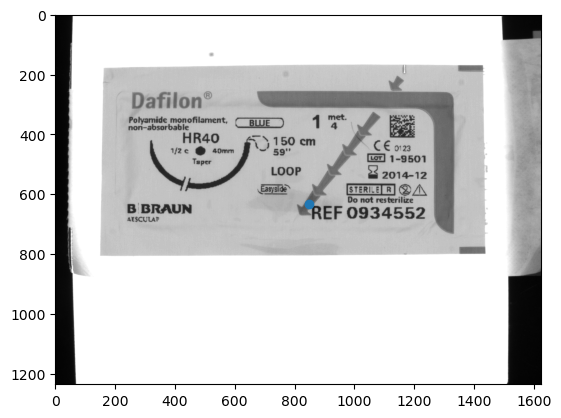

In [527]:
res = cv.matchTemplate(image_test,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8

res[np.where( res <= threshold)] = 0
res[np.where( res > threshold)] = 255

refs = (np.where(res == np.max(res)))
ref_point = [refs[0][0],refs[1][0]]

plt.imshow(image_test,cmap="gray")
plt.scatter(ref_point[1],ref_point[0])
plt.show()

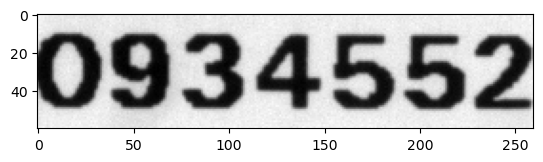

In [476]:
numbers = image_test[ref_point[0]:ref_point[0]+60, ref_point[1]+130:ref_point[1]+390]
plt.imshow(numbers,cmap="gray")

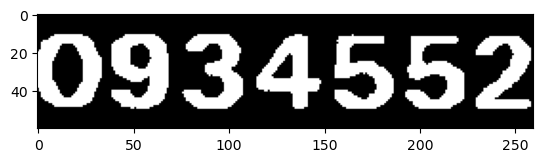

In [477]:
#Apply binary threshold
#first of all threshold the image to convert it to binary
(thresh, numbers) = cv2.threshold(numbers, 120, 255, cv2.THRESH_BINARY)

#invert image
numbers = (numbers*-1)+255
plt.imshow(numbers,cmap="gray")

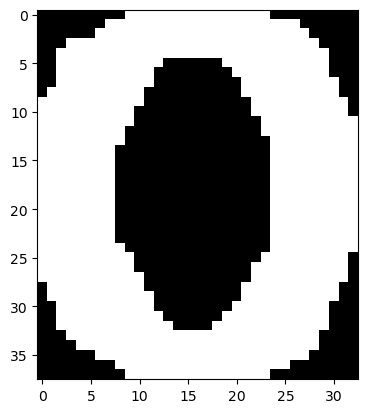

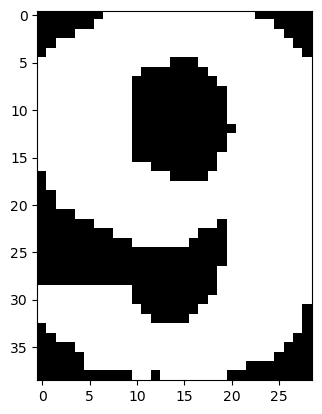

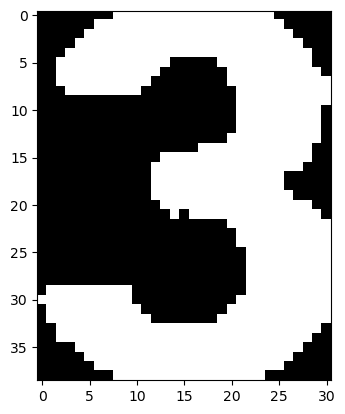

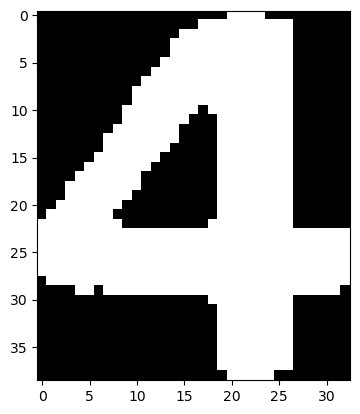

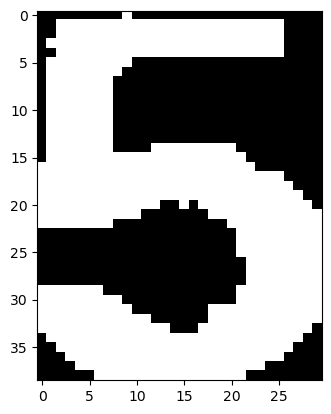

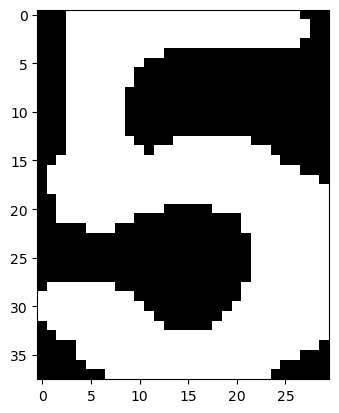

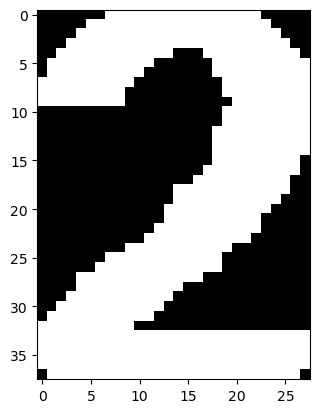

In [489]:
#Now we'll do a column-wise scan to check where numbers start and end so we can get them cut().
squished_image = np.sum(numbers,axis=0)

#we'll store here the cropped number images
digits = []
cnt = 0
start_idx = None
for i, val in enumerate(squished_image):
    if val > 0:
        if(start_idx == None):
            start_idx = i
    
    elif(start_idx != None):
        digits.append(numbers[:,start_idx:i])
        start_idx = None

clean_digits = []
for digit in digits:
    clean_digits.append(crop_to_edges(digit))

for digit in clean_digits:
    plt.imshow(digit,cmap="gray")
    plt.show()

Digit: 


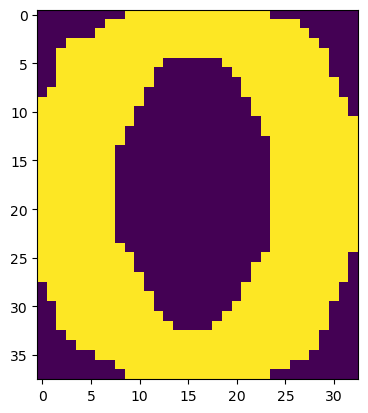

Template max: 
NUMBER DETECTED:  0


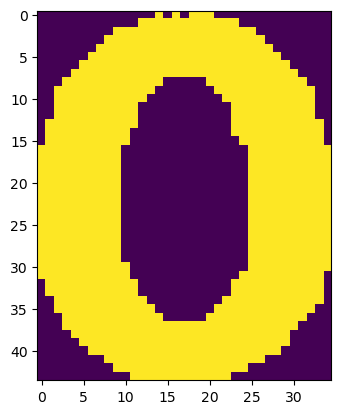


Digit: 


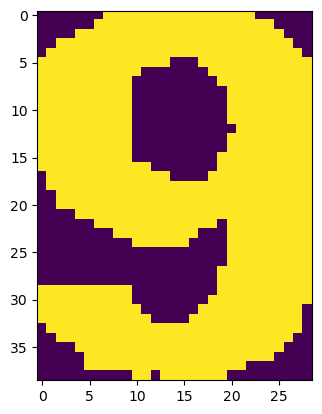

Template max: 
NUMBER DETECTED:  9


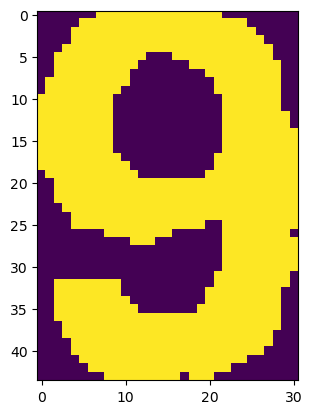


Digit: 


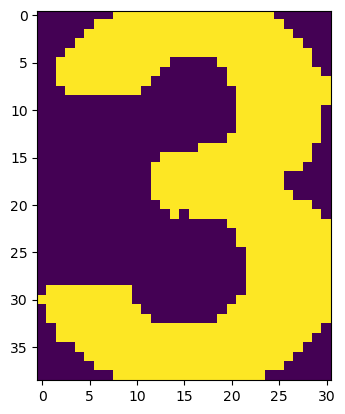

Template max: 
NUMBER DETECTED:  3


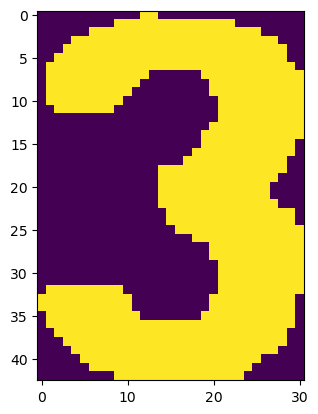


Digit: 


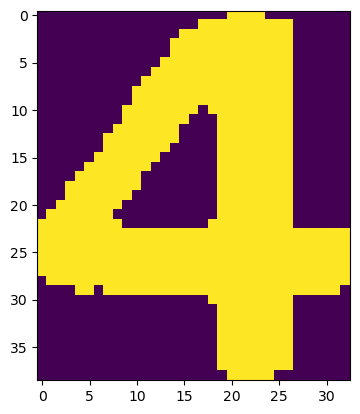

Template max: 
NUMBER DETECTED:  4


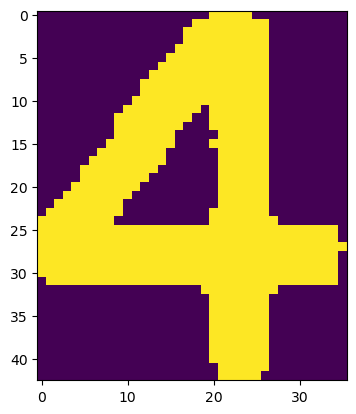


Digit: 


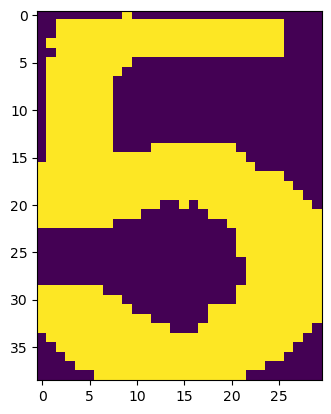

Template max: 
NUMBER DETECTED:  5


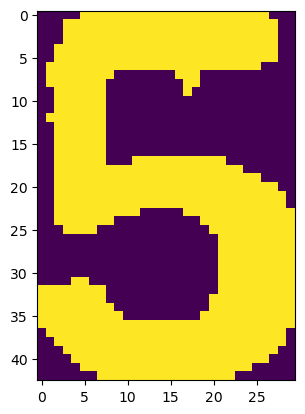


Digit: 


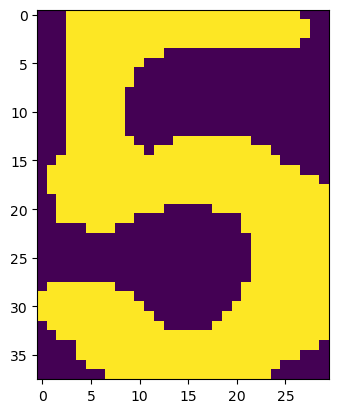

Template max: 
NUMBER DETECTED:  5


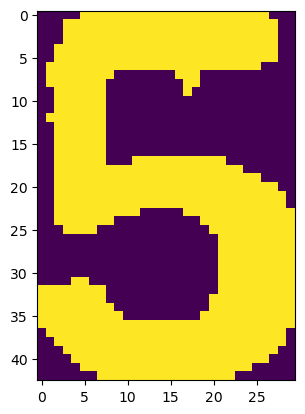


Digit: 


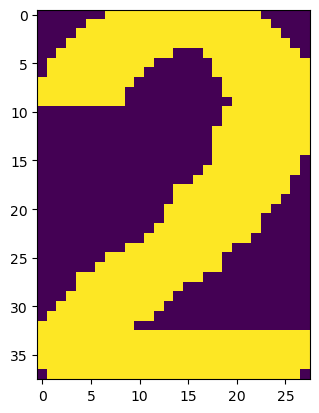

Template max: 
NUMBER DETECTED:  2


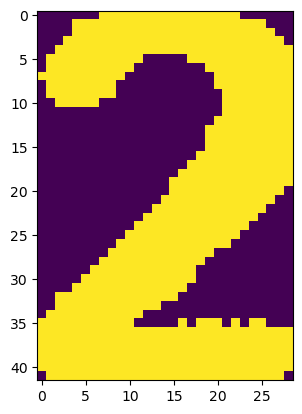

In [490]:
for digit in clean_digits:
    print("Digit: ")
    plt.imshow(digit)
    plt.show()
    print("Template max: ")
    eval_digit, template_match, match = eval_digits(digit,templates)
    print("NUMBER DETECTED: ",match)
    plt.imshow(template_match)
    plt.show()
    print("")